In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
import pandas as pd
%matplotlib inline

## Argon

In [39]:
Argon = pd.read_table('Ar.txt',delimiter=',  ',engine='python', header=None)

Amu = Argon[0] #These are the values of amu that the mass spec searches for

Argon = np.array([entry[:-1] for entry in Argon[1]],dtype='float')*1e6

### Raw Argon Data

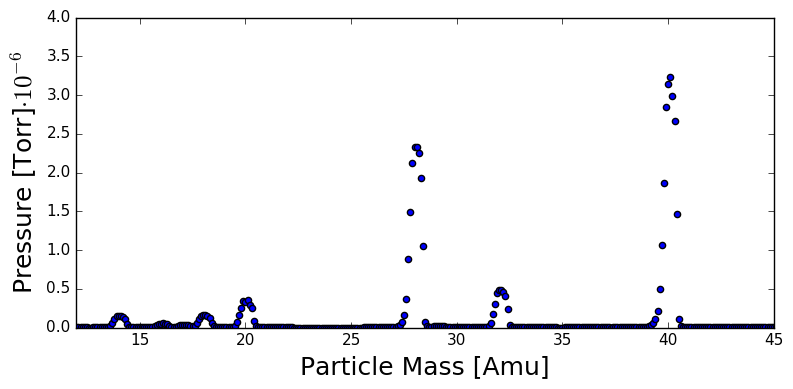

In [40]:
plt.figure(figsize=(9,4))
plt.scatter(Amu, Argon);
ax = plt.gca()
#ax.set_yscale('log')
plt.xlim(12,45);
plt.ylim(0,4)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('RawArgon.png')

In [71]:
np.argmax(Argon)

391

In [79]:
np.argmax(Argon[0:250])

191

In [80]:
Argon[191]

0.34999999999999998

In [81]:
Argon[391]/Argon[191]

9.2285714285714295

### Substract Argon Background

In [41]:
Arbkd = pd.read_table('Background_Ar.txt',delimiter=',  ',engine='python', header=None)

Arbkd = np.array([entry[:-1] for entry in Arbkd[1]],dtype='float')*1e6

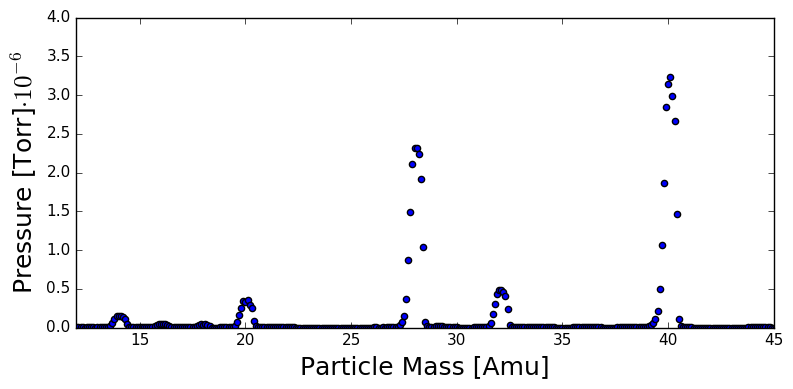

In [42]:
plt.figure(figsize=(9,4))
plt.scatter(Amu, Argon - Arbkd);
ax = plt.gca()
#ax.set_yscale('log')
plt.xlim(12,45);
plt.ylim(0,4)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('TrueArgon.png')

Peak at 14 amu single Nitrogen, probably from Air. Peak at 20, 28, 32 are Neon, N2, and O2. 20 could be CH2 from methanol

Peak at 40 is surely Argon atom

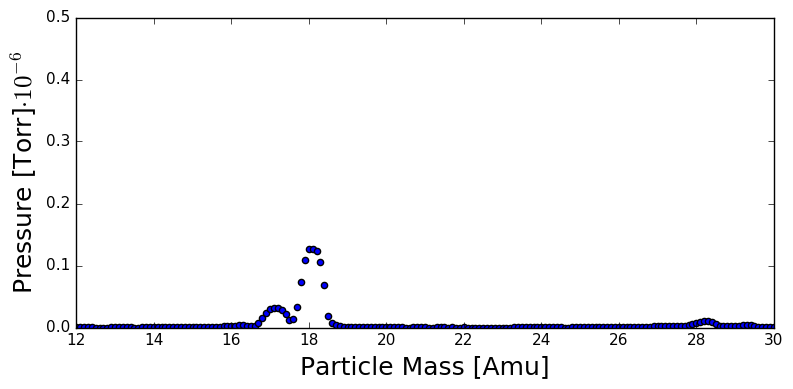

In [43]:
plt.figure(figsize=(9,4))
plt.scatter(Amu, Arbkd);
ax = plt.gca()
#ax.set_yscale('log')
plt.xlim(12,30);
plt.ylim(0,0.5)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('ArgonBackground.png')

Background substraction has removed a single peak at 18 amu and 17 amu, which is the water peak and OH+ fragment.

### Argon Background

## Kyrpton

In [44]:
Krypton = pd.read_table('Kr.txt',delimiter=',  ',engine='python', header=None)

Krypton = np.array([entry[:-1] for entry in Krypton[1]],dtype='float')*1e6

Krbkd = pd.read_table('Background_Kr.txt',delimiter=',  ',engine='python', header=None)

Krbkd = np.array([entry[:-1] for entry in Krbkd[1]],dtype='float')*1e6

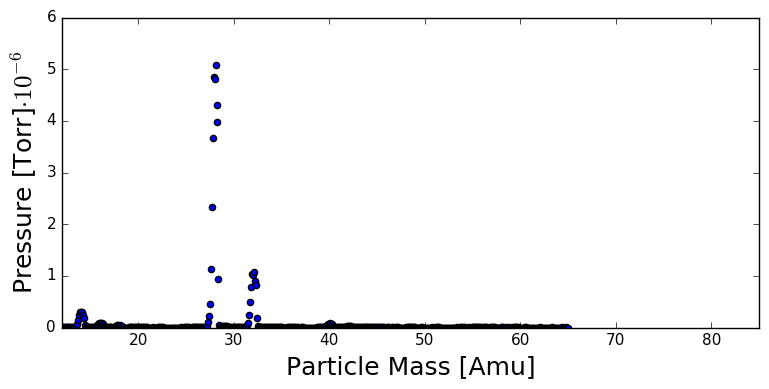

In [45]:
plt.figure(figsize=(9,4))
plt.scatter(Amu, Krypton - Krbkd);
ax = plt.gca()
plt.xlim(12,85);
plt.ylim(0,6)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('Krypton.png')

Here, and for all subsequent measurements on this day, there is a slight peak at 40 amu, which is to be some residual from the Argon test.

Too heavy to be measured, possible for it to have shown near 40.

## Neon

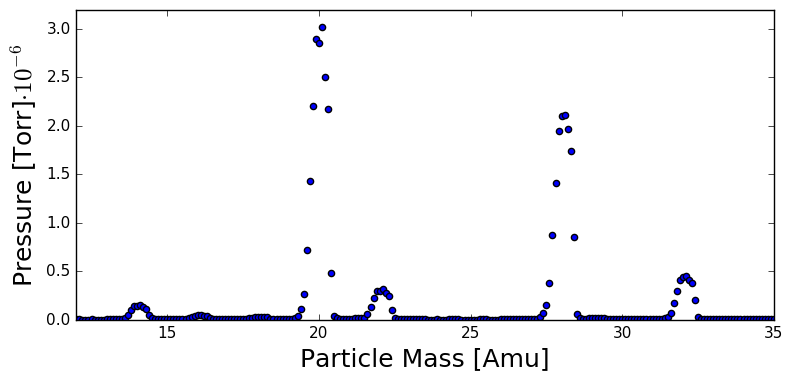

In [46]:
Neon = pd.read_table('Ne.txt',delimiter=',  ',engine='python', header=None)

Neon = np.array([entry[:-1] for entry in Neon[1]],dtype='float')*1e6

Nebkd = pd.read_table('Background_Ne.txt',delimiter=',  ',engine='python', header=None)

Nebkd = np.array([entry[:-1] for entry in Nebkd[1]],dtype='float')*1e6

plt.figure(figsize=(9,4))
plt.scatter(Amu, Neon - Nebkd);
ax = plt.gca()
plt.xlim(12,35);
plt.ylim(0,3.2)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('Neon.png')

20 is Neon. 22 is Unknown. Possibly doubly ionized Neon that grabbed two Hydrogen atoms? Seems far fetched.

## Air

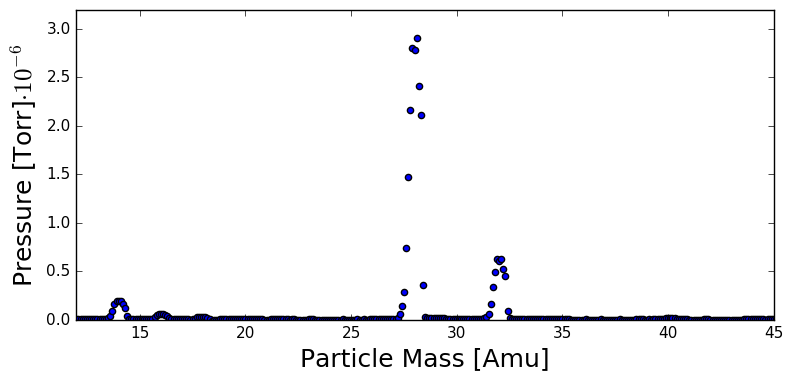

In [67]:
Air = pd.read_table('Air.txt',delimiter=',  ',engine='python', header=None)

Air = np.array([entry[:-1] for entry in Air[1]],dtype='float')*1e6

plt.figure(figsize=(9,4))
plt.scatter(Amu, Air - Nebkd);
ax = plt.gca()
plt.xlim(12,45);
plt.ylim(0,3.2)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('Air.png')

In [65]:
np.argmax(Air[250:289])

21

In [66]:
np.argmax(Air[289:])

22

In [68]:
np.argmax(Air[330:])

61

In [69]:
Air[250:289][21]/Air[289:][22]

4.6117274167987325

In [70]:
Air[250:289][21]/Air[330:][61]

180.74534161490683

Expected ratios are N2/O2 = 3.7 and N2/Ar = 89

# Day 2

## Quick Exhale vs Hold Breath

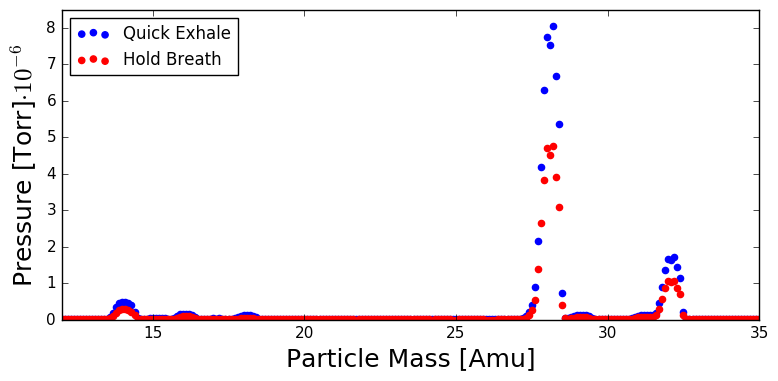

In [48]:
Quick = pd.read_table('QuickExhale.txt',delimiter=',  ',engine='python', header=None)

Quick = np.array([entry[:-1] for entry in Quick[1]],dtype='float')*1e6

Quickbkd = pd.read_table('Background_Breath.txt',delimiter=',  ',engine='python', header=None)

Quickbkd = np.array([entry[:-1] for entry in Quickbkd[1]],dtype='float')*1e6

Hold = pd.read_table('HoldBreath30s.txt',delimiter=',  ',engine='python', header=None)

Hold = np.array([entry[:-1] for entry in Hold[1]],dtype='float')*1e6

plt.figure(figsize=(9,4))
plt.scatter(Amu, Quick - Quickbkd,color='blue',label='Quick Exhale');
plt.scatter(Amu, Hold - Quickbkd,color='red',label = 'Hold Breath');
ax = plt.gca()
plt.xlim(12,35);
plt.ylim(0,8.5)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.legend(loc='upper left')
plt.savefig('Breath.png')

In [55]:
np.argmax(Quick[250:289])

22

In [56]:
Quick[250:290][22]

8.0600000000000005

In [57]:
np.argmax(Quick[289:])

23

In [59]:
Quick[289:][23]

1.72

In [60]:
Quick[250:290][22]/Quick[289:][23]

4.6860465116279073

In [61]:
np.argmax(Hold[250:289])

22

In [62]:
np.argmax(Hold[289:])

23

In [64]:
Hold[250:290][22]/Hold[289:][23]

4.5094339622641506

Note that we were unable to gaurentee that the leak valve was in the exact same position across these two measurements. Qualitatively, we can only extract that in the quick exhale situation the ratio of N2/O2 was 4.68, while in the holding of breath it was 4.51. Not quite as expected.

## Compressed Air Comparison

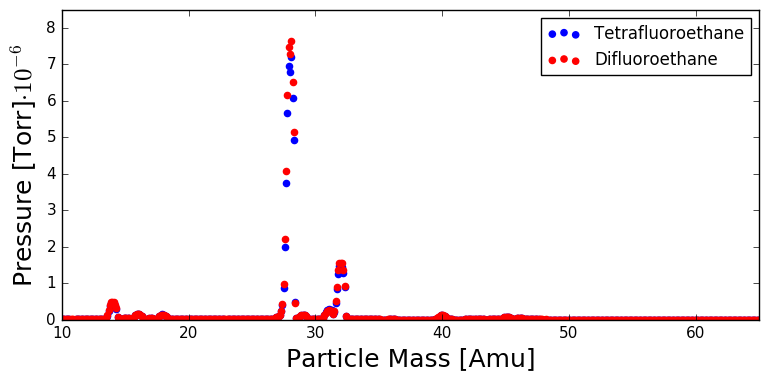

In [23]:
Can1 = pd.read_table('CompressedAir_Tetrafluoroethane.txt',delimiter=',  ',engine='python', header=None)

Can1 = np.array([entry[:-1] for entry in Can1[1]],dtype='float')*1e6

Can2 = pd.read_table('CompressedAir_Difluoroethane.txt',delimiter=',  ',engine='python', header=None)

Can2 = np.array([entry[:-1] for entry in Can2[1]],dtype='float')*1e6

plt.figure(figsize=(9,4))
plt.scatter(Amu, Can1 - Quickbkd,color='blue',label='Tetrafluoroethane');
plt.scatter(Amu, Can2 - Quickbkd,color='red',label = 'Difluoroethane');
ax = plt.gca()
plt.xlim(10,65);
plt.ylim(0,8.5)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.legend(loc='upper right')
plt.savefig('CompressedAir.png')

Peak at 19 possibly fluorine

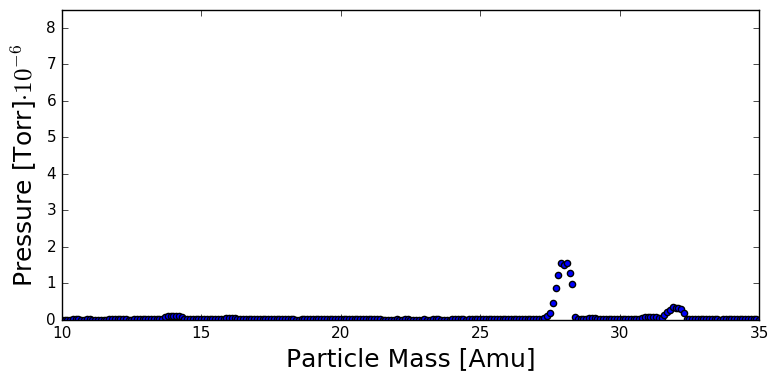

In [24]:
Volcano = pd.read_table('Volcano.txt',delimiter=',  ',engine='python', header=None)

Volcano = np.array([entry[:-1] for entry in Volcano[1]],dtype='float')*1e6

VolcanoBackground = pd.read_table('VolcanoBackground.txt',delimiter=',  ',engine='python', header=None)

VolcanoBackground = np.array([entry[:-1] for entry in VolcanoBackground[1]],dtype='float')*1e6

plt.figure(figsize=(9,4))
plt.scatter(Amu, Volcano - VolcanoBackground);
ax = plt.gca()
plt.xlim(10,35);
plt.ylim(0,8.5)
plt.xlabel('Particle Mass [Amu]',size=18);
plt.ylabel('Pressure [Torr]$\cdot 10^{-6}$',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.savefig('Volcano.png')